## Generating Affinity Map from Segmentation Mask

In [1]:
import numpy as np
from connectomics.config import get_cfg_defaults
from connectomics.data.dataset.build import _get_input
from connectomics.data.utils import seg_to_targets, relabel, seg_widen_border

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

def show(image, cmap='gray', title='Test Title', interpolation=None):
    num_imgs = image.shape[0]
    fig = plt.figure(figsize=(20., 3.))
    fig.suptitle(title, fontsize=15)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1, 6),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
    image_list = np.split(image, num_imgs, 0)
    for ax, im in zip(grid, [np.squeeze(x) for x in image_list]):
        # Iterating over the grid returns the Axes.
        ax.imshow(im, cmap=cmap, interpolation=interpolation)
        ax.axis('off')

    plt.show()

In [3]:
# Load configs and dataset
cfg_filename = '../configs/SNEMI/SNEMI-Base.yaml'
cfg = get_cfg_defaults()
cfg.merge_from_file(cfg_filename)
cfg.DATASET.INPUT_PATH = '../datasets/SNEMI3D/'
cfg.DATASET.PAD_SIZE = [0, 0, 0]
cfg.MODEL.INPUT_SIZE = [8, 256, 256]
volume, labels, _ = _get_input(cfg, 'train')

None 1 ['train_image.h5']
volume shape (original): (100, 1024, 1024)
volume shape (after scaling and padding): (100, 1024, 1024)
label shape (after scaling and padding): (100, 1024, 1024)


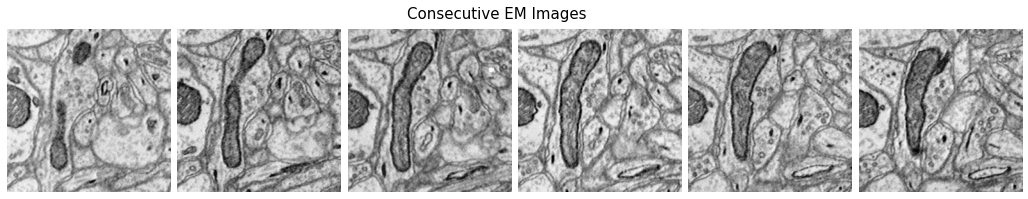

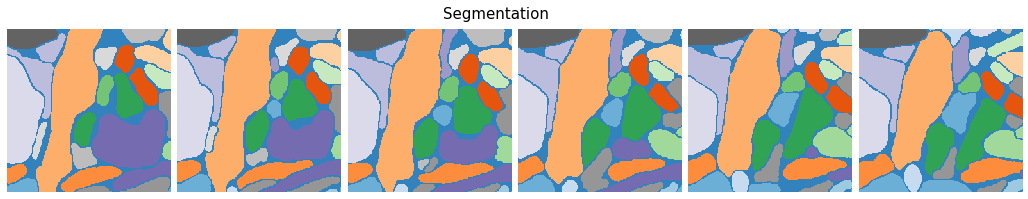

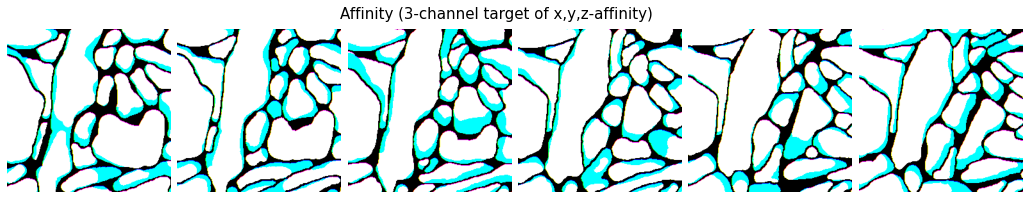

In [4]:
zz, yy, xx = cfg.MODEL.INPUT_SIZE
model_input = volume[0][:zz,:yy,:xx]
model_label = labels[0][:zz,:yy,:xx]
model_label = relabel(model_label)
model_label = seg_widen_border(model_label)
affinity = seg_to_targets(model_label, '2') # The target option for affinity map is '2'
show(model_input[1:-1], title='Consecutive EM Images')
show(model_label[1:-1], cmap='tab20c', title='Segmentation', interpolation='nearest')
show(affinity[0].transpose(1,2,3,0)[1:-1], title='Affinity (3-channel target of x,y,z-affinity)')